# BiciMad Bike Sharing Project

Goal: Prediction of bike count required at each hour for the stable supply of rental bikes


This dataset includes information about the usage that the BiciMad bike sharing service has received during 2022. Each row represents an interaction between a user and the system (a trip between stations).


- date - The date at which the trip took place.
- idbike - The unique id of the bike used for the trip.
- fleet - Fleet to which the bike used belongs, there were two different ones at the time the data was taken.


- trip_minutes - Lenght of the trip in minutes.


- geolocation_unlock - The geological coordinates of the starting spot of the trip.
- address_unlock - The postal address in which the bike was unlocked.
- unlock_date - Exact date and time in which the trip started.

- locktype - State of the bike previous to the trip. They can be anchored in a station or just locked anywhere freely.
- unlocktype - State of the bike after the trip.

- geolocation_lock - The geological coordinates of the final spot of the trip.
- address_lock - The postal address in which the bike was locked.
- lock_date - Exact date and time in which the trip ended.

- station_unlock - Number of the station in which the bike was anchored before the trip, if there was one.
- dock_unlock - Dock of the station in which the bike was anchored before the trip, if there was one.
- unlock_station_name - Name of the station in which the bike was anchored before the trip, if there was one.

- station_lock - Number of the station in which the bike was anchored after the trip, if there was one.
- dock_lock - Dock of the station in which the bike was anchored after the trip, if there was one.
- lock_station_name - Name of the station in which the bike was anchored after the trip, if there was one.

## LIBRARIES AND DATA LOADING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

In [2]:
pd.options.display.max_columns = 20 # Sets the maximum number of columns to display at 20
pd.options.display.max_rows = 20 # Sets the maximum number of rows to display at 20
pd.options.display.max_colwidth = 80 # Sets the maximum width of each column in characters
np.set_printoptions(precision = 4, suppress = True) # Sets the printing options for Numpy arrays (4 decimals)

In [3]:
dataframe = pd.read_csv(r'C:\Users\PC\OneDrive\Escritorio\DATA_PROJECTS\bicimad-project\data\raw\bicimad_trips.csv', low_memory=False) # We load the file without attempting to infer data types.

In [4]:
print(dataframe.dtypes) # Check the data types of each column


Unnamed: 0               int64
fecha                   object
idBike                 float64
fleet                  float64
trip_minutes           float64
geolocation_unlock      object
address_unlock          object
unlock_date             object
locktype                object
unlocktype              object
geolocation_lock        object
address_lock            object
lock_date               object
station_unlock          object
dock_unlock            float64
unlock_station_name     object
station_lock           float64
dock_lock              float64
lock_station_name       object
dtype: object


In [5]:
mixed_type_columns = dataframe.columns[dataframe.dtypes == 'object'] # Check the columns with mixed types
print(mixed_type_columns)


Index(['fecha', 'geolocation_unlock', 'address_unlock', 'unlock_date',
       'locktype', 'unlocktype', 'geolocation_lock', 'address_lock',
       'lock_date', 'station_unlock', 'unlock_station_name',
       'lock_station_name'],
      dtype='object')


In [6]:
for col in mixed_type_columns: # Inspect the uniques values or value counts to better understand the mix of data types
    print(f"Column {col}:")
    print(dataframe[col].apply(type).value_counts())
    print("\n")


Column fecha:
fecha
<class 'str'>    4144134
Name: count, dtype: int64


Column geolocation_unlock:
geolocation_unlock
<class 'str'>    4144134
Name: count, dtype: int64


Column address_unlock:
address_unlock
<class 'str'>      3595660
<class 'float'>     548474
Name: count, dtype: int64


Column unlock_date:
unlock_date
<class 'str'>    4144134
Name: count, dtype: int64


Column locktype:
locktype
<class 'str'>    4144134
Name: count, dtype: int64


Column unlocktype:
unlocktype
<class 'str'>    4144134
Name: count, dtype: int64


Column geolocation_lock:
geolocation_lock
<class 'str'>    4144134
Name: count, dtype: int64


Column address_lock:
address_lock
<class 'str'>      3596532
<class 'float'>     547602
Name: count, dtype: int64


Column lock_date:
lock_date
<class 'str'>    4144134
Name: count, dtype: int64


Column station_unlock:
station_unlock
<class 'str'>      4127342
<class 'float'>      16792
Name: count, dtype: int64


Column unlock_station_name:
unlock_station_name
<

## CHECKING OUT THE DATA

In [7]:
dataframe.head()

,Unnamed: 0,fecha,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name
0,0,2022-01-01,1718.0,1.0,16.28,"{'type': 'Point', 'coordinates': [-3.6714166, 40.4318611]}",NaN,2022-01-01T00:02:20,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.688398, 40.419752]}",NaN,2022-01-01T00:18:37,200.0,3.0,Avenida de los Toreros,64.0,4.0,Plaza de la Independencia
1,1,2022-01-01,7340.0,1.0,7.10,"{'type': 'Point', 'coordinates': [-3.6894193, 40.4166834]}",NaN,2022-01-01T00:07:53,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6993465, 40.4309524]}",NaN,2022-01-01T00:14:59,69.0,5.0,Antonio Maura,169.0,17.0,Manuel Silvela
2,2,2022-01-01,3861.0,1.0,0.48,"{'type': 'Point', 'coordinates': [-3.688822, 40.409808]}",NaN,2022-01-01T00:09:21,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.688822, 40.409808]}",NaN,2022-01-01T00:09:50,73.0,21.0,Puerta del Ángel Caído,73.0,21.0,Puerta del Ángel Caído
3,3,2022-01-01,7657.0,1.0,6.62,"{'type': 'Point', 'coordinates': [-3.6653055, 40.426]}",NaN,2022-01-01T00:09:52,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6657777, 40.4186666]}",NaN,2022-01-01T00:16:29,192.0,22.0,Marqués de Zafra,190.0,17.0,Parque Roma
4,4,2022-01-01,6653.0,1.0,8.07,"{'type': 'Point', 'coordinates': [-3.6983055, 40.3962222]}",NaN,2022-01-01T00:09:57,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7025024, 40.4101564]}",NaN,2022-01-01T00:18:01,183.0,3.0,Jaime el Conquistador,47.0,24.0,Jesús y María


In [8]:
dataframe.shape

(4144134, 19)

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4144134 entries, 0 to 4144133
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   fecha                object 
 2   idBike               float64
 3   fleet                float64
 4   trip_minutes         float64
 5   geolocation_unlock   object 
 6   address_unlock       object 
 7   unlock_date          object 
 8   locktype             object 
 9   unlocktype           object 
 10  geolocation_lock     object 
 11  address_lock         object 
 12  lock_date            object 
 13  station_unlock       object 
 14  dock_unlock          float64
 15  unlock_station_name  object 
 16  station_lock         float64
 17  dock_lock            float64
 18  lock_station_name    object 
dtypes: float64(6), int64(1), object(12)
memory usage: 600.7+ MB


In [10]:
duplicates = dataframe.duplicated()

duplicates.sum()

0

In [11]:
total_na = dataframe.isnull().sum().sort_values(ascending = False)

print(total_na)

address_unlock         548474
address_lock           547602
lock_station_name       19907
dock_lock               19907
station_lock            19907
unlock_station_name     16792
dock_unlock             16792
station_unlock          16792
geolocation_lock            0
lock_date                   0
Unnamed: 0                  0
fecha                       0
locktype                    0
unlock_date                 0
geolocation_unlock          0
trip_minutes                0
fleet                       0
idBike                      0
unlocktype                  0
dtype: int64


In [12]:
percent_1 = dataframe.isnull().sum()/dataframe.isnull().count()*100

print(percent_1)

Unnamed: 0              0.000000
fecha                   0.000000
idBike                  0.000000
fleet                   0.000000
trip_minutes            0.000000
geolocation_unlock      0.000000
address_unlock         13.234948
unlock_date             0.000000
locktype                0.000000
unlocktype              0.000000
geolocation_lock        0.000000
address_lock           13.213907
lock_date               0.000000
station_unlock          0.405199
dock_unlock             0.405199
unlock_station_name     0.405199
station_lock            0.480366
dock_lock               0.480366
lock_station_name       0.480366
dtype: float64


In [13]:
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

print(percent_2)

address_unlock         13.2
address_lock           13.2
lock_station_name       0.5
dock_lock               0.5
station_lock            0.5
unlock_station_name     0.4
dock_unlock             0.4
station_unlock          0.4
geolocation_lock        0.0
lock_date               0.0
Unnamed: 0              0.0
fecha                   0.0
locktype                0.0
unlock_date             0.0
geolocation_unlock      0.0
trip_minutes            0.0
fleet                   0.0
idBike                  0.0
unlocktype              0.0
dtype: float64


In [14]:
# Let's get rid of the missing values as they will give us problems later

dataframe.dropna(how = 'all')

,Unnamed: 0,fecha,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name
0,0,2022-01-01,1718.0,1.0,16.28,"{'type': 'Point', 'coordinates': [-3.6714166, 40.4318611]}",NaN,2022-01-01T00:02:20,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.688398, 40.419752]}",NaN,2022-01-01T00:18:37,200.0,3.0,Avenida de los Toreros,64.0,4.0,Plaza de la Independencia
1,1,2022-01-01,7340.0,1.0,7.10,"{'type': 'Point', 'coordinates': [-3.6894193, 40.4166834]}",NaN,2022-01-01T00:07:53,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6993465, 40.4309524]}",NaN,2022-01-01T00:14:59,69.0,5.0,Antonio Maura,169.0,17.0,Manuel Silvela
2,2,2022-01-01,3861.0,1.0,0.48,"{'type': 'Point', 'coordinates': [-3.688822, 40.409808]}",NaN,2022-01-01T00:09:21,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.688822, 40.409808]}",NaN,2022-01-01T00:09:50,73.0,21.0,Puerta del Ángel Caído,73.0,21.0,Puerta del Ángel Caído
3,3,2022-01-01,7657.0,1.0,6.62,"{'type': 'Point', 'coordinates': [-3.6653055, 40.426]}",NaN,2022-01-01T00:09:52,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6657777, 40.4186666]}",NaN,2022-01-01T00:16:29,192.0,22.0,Marqués de Zafra,190.0,17.0,Parque Roma
4,4,2022-01-01,6653.0,1.0,8.07,"{'type': 'Point', 'coordinates': [-3.6983055, 40.3962222]}",NaN,2022-01-01T00:09:57,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7025024, 40.4101564]}",NaN,2022-01-01T00:18:01,183.0,3.0,Jaime el Conquistador,47.0,24.0,Jesús y María
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144129,4144129,2022-12-31,7374.0,1.0,0.65,"{'type': 'Point', 'coordinates': [-3.6977715, 40.4251906]}",'Calle Hortaleza nº 75',2022-12-31T23:54:35,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6977715, 40.4251906]}",'Calle Hortaleza nº 75',2022-12-31T23:55:14,8.0,1.0,7 - Hortaleza,8.0,1.0,7 - Hortaleza
4144130,4144130,2022-12-31,8072.0,1.0,0.17,"{'type': 'Point', 'coordinates': [-3.6944768, 40.4032208]}",'Calle Palos de la Frontera nº 27',2022-12-31T23:55:07,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6944768, 40.4032208]}",'Calle Palos de la Frontera nº 27',2022-12-31T23:55:17,128.0,19.0,120 - Palos de la Frontera,128.0,19.0,120 - Palos de la Frontera
4144131,4144131,2022-12-31,6475.0,1.0,17.45,"{'type': 'Point', 'coordinates': [-3.6944768, 40.4032208]}",'Calle Palos de la Frontera nº 27',2022-12-31T23:55:54,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7007164, 40.4144226]}",'Plaza de Santa Ana nº 10',2023-01-01T00:13:21,128.0,20.0,120 - Palos de la Frontera,56.0,24.0,52 - Plaza de Santa Ana
4144132,4144132,2022-12-31,6283.0,1.0,48.92,"{'type': 'Point', 'coordinates': [-3.6607768678037744, 40.39901531507069]}",'Camino de Valderribas nº 94',2022-12-31T23:57:22,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6902255, 40.4075685]}",'Paseo de la Infanta Isabel nº 3',2023-01-01T01:46:17,234.0,17.0,226 - Sierra Toledana,84.0,18.0,80a - Atocha A


## DATA CLEANING

In [15]:
dataframe.head()

,Unnamed: 0,fecha,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name
0,0,2022-01-01,1718.0,1.0,16.28,"{'type': 'Point', 'coordinates': [-3.6714166, 40.4318611]}",NaN,2022-01-01T00:02:20,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.688398, 40.419752]}",NaN,2022-01-01T00:18:37,200.0,3.0,Avenida de los Toreros,64.0,4.0,Plaza de la Independencia
1,1,2022-01-01,7340.0,1.0,7.10,"{'type': 'Point', 'coordinates': [-3.6894193, 40.4166834]}",NaN,2022-01-01T00:07:53,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6993465, 40.4309524]}",NaN,2022-01-01T00:14:59,69.0,5.0,Antonio Maura,169.0,17.0,Manuel Silvela
2,2,2022-01-01,3861.0,1.0,0.48,"{'type': 'Point', 'coordinates': [-3.688822, 40.409808]}",NaN,2022-01-01T00:09:21,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.688822, 40.409808]}",NaN,2022-01-01T00:09:50,73.0,21.0,Puerta del Ángel Caído,73.0,21.0,Puerta del Ángel Caído
3,3,2022-01-01,7657.0,1.0,6.62,"{'type': 'Point', 'coordinates': [-3.6653055, 40.426]}",NaN,2022-01-01T00:09:52,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6657777, 40.4186666]}",NaN,2022-01-01T00:16:29,192.0,22.0,Marqués de Zafra,190.0,17.0,Parque Roma
4,4,2022-01-01,6653.0,1.0,8.07,"{'type': 'Point', 'coordinates': [-3.6983055, 40.3962222]}",NaN,2022-01-01T00:09:57,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7025024, 40.4101564]}",NaN,2022-01-01T00:18:01,183.0,3.0,Jaime el Conquistador,47.0,24.0,Jesús y María


In [16]:
del dataframe['Unnamed: 0']

In [17]:
dataframe.head()

,fecha,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name
0,2022-01-01,1718.0,1.0,16.28,"{'type': 'Point', 'coordinates': [-3.6714166, 40.4318611]}",NaN,2022-01-01T00:02:20,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.688398, 40.419752]}",NaN,2022-01-01T00:18:37,200.0,3.0,Avenida de los Toreros,64.0,4.0,Plaza de la Independencia
1,2022-01-01,7340.0,1.0,7.10,"{'type': 'Point', 'coordinates': [-3.6894193, 40.4166834]}",NaN,2022-01-01T00:07:53,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6993465, 40.4309524]}",NaN,2022-01-01T00:14:59,69.0,5.0,Antonio Maura,169.0,17.0,Manuel Silvela
2,2022-01-01,3861.0,1.0,0.48,"{'type': 'Point', 'coordinates': [-3.688822, 40.409808]}",NaN,2022-01-01T00:09:21,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.688822, 40.409808]}",NaN,2022-01-01T00:09:50,73.0,21.0,Puerta del Ángel Caído,73.0,21.0,Puerta del Ángel Caído
3,2022-01-01,7657.0,1.0,6.62,"{'type': 'Point', 'coordinates': [-3.6653055, 40.426]}",NaN,2022-01-01T00:09:52,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6657777, 40.4186666]}",NaN,2022-01-01T00:16:29,192.0,22.0,Marqués de Zafra,190.0,17.0,Parque Roma
4,2022-01-01,6653.0,1.0,8.07,"{'type': 'Point', 'coordinates': [-3.6983055, 40.3962222]}",NaN,2022-01-01T00:09:57,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7025024, 40.4101564]}",NaN,2022-01-01T00:18:01,183.0,3.0,Jaime el Conquistador,47.0,24.0,Jesús y María


## ASKING QUESTIONS TO THE DATA

### How many bikes does BiciMad have?


In [18]:
bikes = dataframe['idBike'].unique().sum()

print("BiciMad has a total of", bikes, "bikes.")

BiciMad has a total of 22353092.0 bikes.


### How many fleets does it have?

In [19]:
fleets = dataframe['fleet'].unique()

print("BiciMad has a total of 2 fleets.")

BiciMad has a total of 2 fleets.


### How many bikes are in each fleet?

In [20]:
bike_count = dataframe.groupby('fleet').size()

# Imprimir el número de bicicletas por flota
for fleet, count in bike_count.items():
    print(f"Fleet {fleet} has {count} bikes")

Fleet 1.0 has 4111082 bikes
Fleet 2.0 has 33052 bikes


### What's the daily and hourly use of the bikes?

In [21]:
# Vamos a calcular el uso diario y el uso por hora de las bicicletas

dataframe['unlock_date'] = pd.to_datetime(dataframe['unlock_date']) # Convertimos unlock_date en variable datetime

dataframe['day'] = dataframe['unlock_date'].dt.date # Extraemos el día de unlock_date
dataframe['hour'] = dataframe['unlock_date'].dt.hour # Extraemos la hora de unlock_date

daily_usage = dataframe.groupby('day').size() # Contamos los viajes por día
hourly_usage = dataframe.groupby('hour').size() # Contamos los viajes por hora


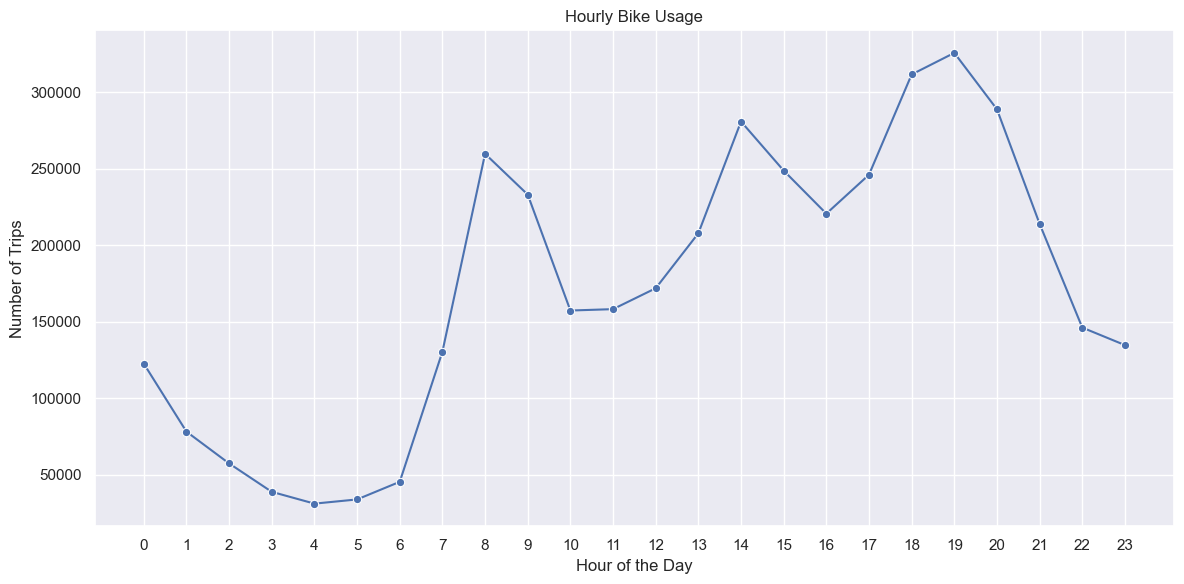

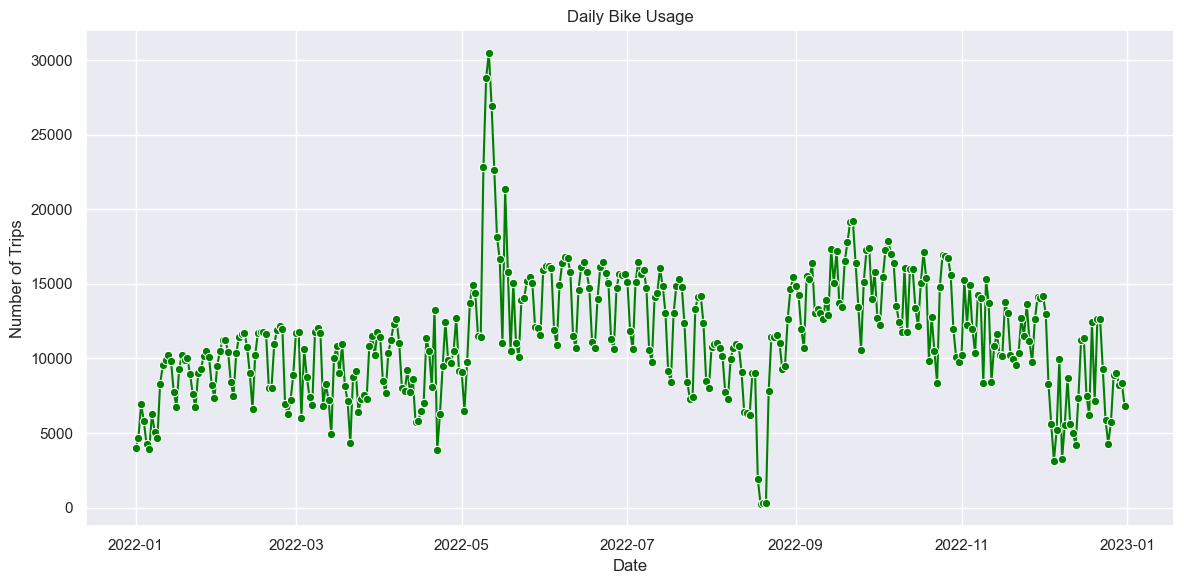

In [22]:
# Hourly Usage Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_usage.index, y=hourly_usage.values, marker='o')
plt.title('Hourly Bike Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))  # Setting x-ticks for every hour
plt.tight_layout()

# Daily Usage Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_usage.index, y=daily_usage.values, marker='o', color='green')
plt.title('Daily Bike Usage')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.tight_layout()

plt.show()


### What are the stations with the highest demand for bike pickups?

In [23]:
unlock_station_demand = dataframe.groupby(['station_unlock', 'unlock_station_name']).size() # Agrupamos las estaciones donde se producen los unlocks y los unlocks

unlock_station_demand_sorted = unlock_station_demand.sort_values(ascending = False) # Ordenamos de mayor a menor

top_unlock_stations = unlock_station_demand_sorted.head(5) # Mostramos las 5 estaciones con mayor demanda de bicicletas

top_unlock_stations

station_unlock  unlock_station_name     
43.0            39 - Plaza de la Cebada     30297
57.0            53 - Plaza de Lavapiés      28993
175.0           167 - Segovia 45            25544
220.0           212 - Marqués de Vadillo    24390
208.0           200 - Quevedo               23242
dtype: int64

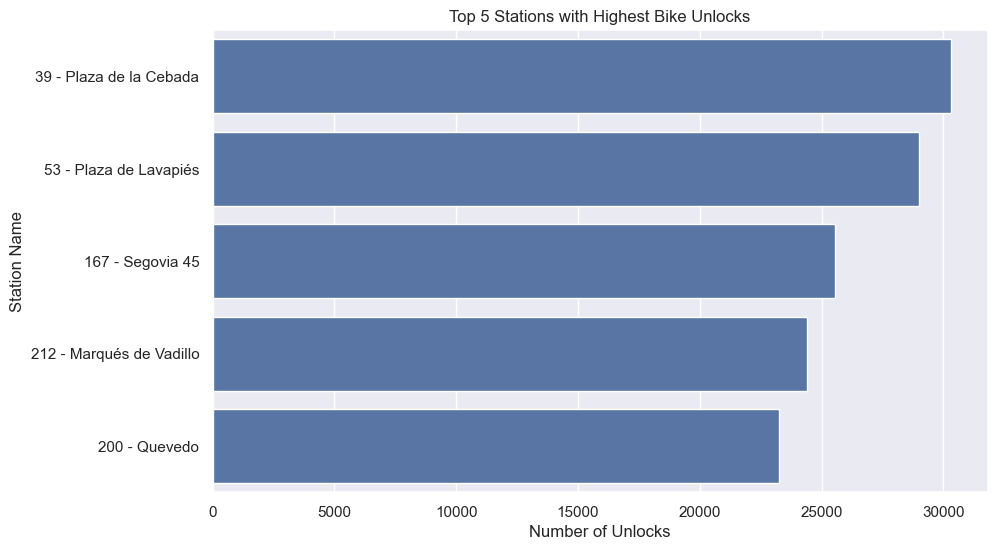

In [24]:
# Convert the top_unlock_stations Series to a DataFrame for easier plotting
top_unlock_stations_df = top_unlock_stations.reset_index()
top_unlock_stations_df.columns = ['Station ID', 'Station Name', 'Number of Unlocks']

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Unlocks', y='Station Name', data=top_unlock_stations_df)

# Adding titles and labels
plt.title('Top 5 Stations with Highest Bike Unlocks')
plt.xlabel('Number of Unlocks')
plt.ylabel('Station Name')

plt.show()

### What are routes with highest frequency of bike movements?

In [25]:
route_demand = dataframe.groupby(['station_unlock', 'unlock_station_name', 'station_lock', 'lock_station_name']).size() # Agrupamos por locks y unlocks por estación y contamos los viajes en cada ruta

route_demand_sorted = route_demand.sort_values(ascending = False) # Ordenamos de mayor a menor 

top_routes = route_demand_sorted.head(5) # Mostramos als 5 rutas con mayor frecuencia de movimiento

top_routes

station_unlock  unlock_station_name             station_lock  lock_station_name             
175.0           167 - Segovia 45                175.0         167 - Segovia 45                  6981
57.0            53 - Plaza de Lavapiés          57.0          53 - Plaza de Lavapiés            5430
43.0            39 - Plaza de la Cebada         43.0          39 - Plaza de la Cebada           5139
220.0           212 - Marqués de Vadillo        220.0         212 - Marqués de Vadillo          5032
64.0            60 - Plaza de la Independencia  64.0          60 - Plaza de la Independencia    4781
dtype: int64

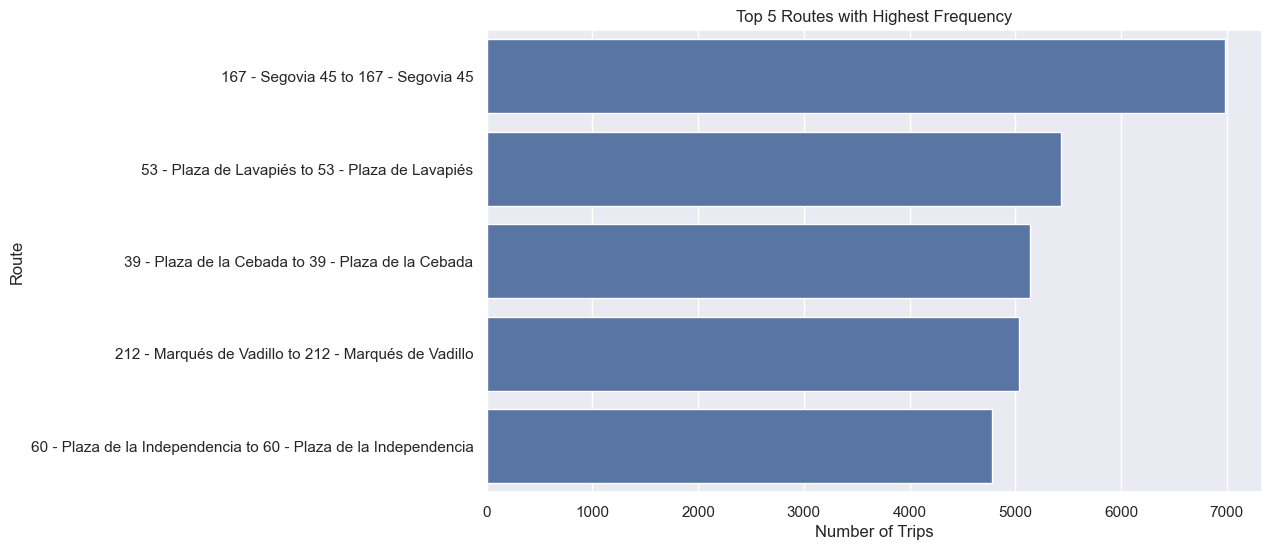

In [26]:
# Convert the top_routes Series to a DataFrame
top_routes_df = top_routes.reset_index()
top_routes_df.columns = ['Station Unlock ID', 'Unlock Station Name', 'Station Lock ID', 'Lock Station Name', 'Number of Trips']

# Create a new column to represent each route as a string
top_routes_df['Route'] = top_routes_df['Unlock Station Name'] + ' to ' + top_routes_df['Lock Station Name']

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Trips', y='Route', data=top_routes_df)

# Adding titles and labels
plt.title('Top 5 Routes with Highest Frequency')
plt.xlabel('Number of Trips')
plt.ylabel('Route')

plt.show()

### What is the average duration of a trip?

In [27]:
average_trip_duration = dataframe['trip_minutes'].mean()

print("The average trip duration is", round(average_trip_duration, 2), "minutes.")


The average trip duration is 22.55 minutes.


### Transform datatypes that can be useful later

In [28]:
# Re-inspecting the format of the geolocation columns
dataframe[['geolocation_unlock', 'geolocation_lock']].head(5)


,geolocation_unlock,geolocation_lock
0,"{'type': 'Point', 'coordinates': [-3.6714166, 40.4318611]}","{'type': 'Point', 'coordinates': [-3.688398, 40.419752]}"
1,"{'type': 'Point', 'coordinates': [-3.6894193, 40.4166834]}","{'type': 'Point', 'coordinates': [-3.6993465, 40.4309524]}"
2,"{'type': 'Point', 'coordinates': [-3.688822, 40.409808]}","{'type': 'Point', 'coordinates': [-3.688822, 40.409808]}"
3,"{'type': 'Point', 'coordinates': [-3.6653055, 40.426]}","{'type': 'Point', 'coordinates': [-3.6657777, 40.4186666]}"
4,"{'type': 'Point', 'coordinates': [-3.6983055, 40.3962222]}","{'type': 'Point', 'coordinates': [-3.7025024, 40.4101564]}"


In [29]:
# Function to safely extract latitude and longitude from the geolocation strings

def extract_coordinates(geolocation_str):
    try:
        #Safely evaluate the string as a dictionary
        geolocation_dict = eval(geolocation_str)
        # Extract coordinates
        coordinates = geolocation_dict.get('coordinates', [None, None])
        # Return latitude and longitude
        return coordinates[1], coordinates[0]
    except:
        # Return None values if extraction fails
        return None, None

#Applying the function to the dataset
dataframe['latitude_unlock'], dataframe['longitude_unlock'] = zip(*dataframe['geolocation_unlock'].apply(extract_coordinates))
dataframe['latitude_lock'], dataframe['longitude_lock'] = zip(*dataframe['geolocation_lock'].apply(extract_coordinates))

# Displaying the extracted coordinates
dataframe[['latitude_unlock', 'longitude_unlock', 'latitude_lock', 'longitude_lock']].head(5)


,latitude_unlock,longitude_unlock,latitude_lock,longitude_lock
0,40.431861,-3.671417,40.419752,-3.688398
1,40.416683,-3.689419,40.430952,-3.699346
2,40.409808,-3.688822,40.409808,-3.688822
3,40.426000,-3.665306,40.418667,-3.665778
4,40.396222,-3.698306,40.410156,-3.702502


In [30]:
dataframe[['latitude_unlock', 'longitude_unlock', 'latitude_lock', 'longitude_lock']].dtypes

latitude_unlock     float64
longitude_unlock    float64
latitude_lock        object
longitude_lock       object
dtype: object

In [31]:
dataframe['latitude_lock'] = pd.to_numeric(dataframe['latitude_lock'], errors='coerce')
dataframe['longitude_lock'] = pd.to_numeric(dataframe['longitude_lock'], errors='coerce')


In [32]:
dataframe[['latitude_unlock', 'longitude_unlock', 'latitude_lock', 'longitude_lock']].dtypes

latitude_unlock     float64
longitude_unlock    float64
latitude_lock       float64
longitude_lock      float64
dtype: object

In [33]:
# bicimad_map = dataframe[['idBike', 'latitude_unlock', 'longitude_unlock', 'latitude_lock', 'longitude_lock']]

# bicimad_map = bicimad_map.sample(n=10000)

In [34]:
# import folium

# mean_lat = dataframe[['latitude_unlock', 'latitude_lock']].mean().mean()
# mean_lon = dataframe[['longitude_unlock', 'longitude_lock']].mean().mean()
# bicimad_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=12)



In [35]:
# Function to create a map with unlock and lock locations
# def create_bike_locations_map(data, unlock_lat_col, unlock_lon_col, lock_lat_col, lock_lon_col):
    # Starting point for the map
    # start_coords = [data[unlock_lat_col].mean(), data[unlock_lon_col].mean()]
    # bike_map = folium.Map(location=start_coords, zoom_start=12)

    # Adding markers for unlock locations
    # for _, row in data.iterrows():
        # unlock_point = [row[unlock_lat_col], row[unlock_lon_col]]
        # folium.CircleMarker(
            # location=unlock_point,
            # radius=3,
            # color='green',
            # fill=True,
            # fill_color='green',
            # fill_opacity=0.7,
            # popup=f"Unlock: {unlock_point}"
        # ).add_to(bike_map)

    # Adding markers for lock locations
    # for _, row in data.iterrows():
        # lock_point = [row[lock_lat_col], row[lock_lon_col]]
        # folium.CircleMarker(
            # location=lock_point,
            # radius=3,
            # color='red',
            # fill=True,
            # fill_color='red',
            # fill_opacity=0.7,
            # popup=f"Lock: {lock_point}"
        # ).add_to(bike_map)

    # return bike_map

# Create the map with bike unlock and lock locations
# bike_locations_map = create_bike_locations_map(bicimad_map, 'latitude_unlock', 'longitude_unlock', 'latitude_lock', 'longitude_lock')

# Display the map
# bike_locations_map



### Eliminamos columnas que no nos sirven de cara al desarrollo del modelo de Machine Learning

In [36]:
dataframe.drop([
    'fecha',
'geolocation_unlock',
'address_unlock',
'unlock_date',
'locktype',
'unlocktype',
'geolocation_lock',
'address_lock',
'lock_date',
'station_unlock',
'unlock_station_name',
'lock_station_name',
], axis=1, inplace= True)

In [37]:
dataframe.drop(['day'], axis=1, inplace= True)

## DESCRIPTIVE ANALYSIS

In [38]:
dataframe.describe()

,idBike,fleet,trip_minutes,dock_unlock,station_lock,dock_lock,hour,latitude_unlock,longitude_unlock,latitude_lock,longitude_lock
count,4.144134e+06,4.144134e+06,4.144134e+06,4.127342e+06,4.124227e+06,4.124227e+06,4.144134e+06,4.144134e+06,4.144134e+06,4.144131e+06,4.144131e+06
mean,5.652766e+03,1.007976e+00,2.254690e+01,1.237374e+01,1.272375e+02,1.239501e+01,1.395015e+01,4.042007e+01,-3.694184e+00,4.041944e+01,-3.694273e+00
std,2.104739e+03,8.894944e-02,2.840467e+02,7.560388e+00,7.531190e+01,7.582397e+00,5.874868e+00,3.367972e-01,3.506742e-02,3.494327e-01,3.615006e-02
min,0.000000e+00,1.000000e+00,-8.677330e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.784868e+00,0.000000e+00,-3.784868e+00
25%,4.529000e+03,1.000000e+00,5.930000e+00,5.000000e+00,5.800000e+01,5.000000e+00,1.000000e+01,4.041071e+01,-3.706193e+00,4.040981e+01,-3.706193e+00
50%,6.263000e+03,1.000000e+00,1.075000e+01,1.200000e+01,1.280000e+02,1.200000e+01,1.500000e+01,4.042229e+01,-3.697895e+00,4.042197e+01,-3.698232e+00
75%,7.356000e+03,1.000000e+00,1.655000e+01,1.900000e+01,1.900000e+02,1.900000e+01,1.900000e+01,4.043373e+01,-3.683158e+00,4.043369e+01,-3.683158e+00
max,8.090000e+03,2.000000e+00,4.179560e+04,3.000000e+01,5.080000e+02,3.000000e+01,2.300000e+01,4.051845e+01,0.000000e+00,4.053073e+01,0.000000e+00


### Correlation Matrix (Heatmap)

In [39]:
dataframe['latitude_unlock_rounded'] = dataframe['latitude_unlock'].round(2)
dataframe['longitude_unlock_rounded'] = dataframe['longitude_unlock'].round(2)

# Group by hour, day, and rounded location
grouped_data = dataframe.groupby(['hour', 'latitude_unlock_rounded', 'longitude_unlock_rounded']).size().reset_index(name='demand')

grouped_data

,hour,latitude_unlock_rounded,longitude_unlock_rounded,demand
0,0,40.36,-3.70,1
1,0,40.37,-3.70,1
2,0,40.38,-3.75,1
3,0,40.38,-3.72,1
4,0,40.38,-3.70,3
...,...,...,...,...
3279,23,40.50,-3.61,1
3280,23,40.51,-3.70,1
3281,23,40.51,-3.68,2
3282,23,40.51,-3.67,1


In [40]:
full_dataframe = pd.merge(dataframe, grouped_data)

In [41]:
full_dataframe.head(5)

,idBike,fleet,trip_minutes,dock_unlock,station_lock,dock_lock,hour,latitude_unlock,longitude_unlock,latitude_lock,longitude_lock,latitude_unlock_rounded,longitude_unlock_rounded,demand
0,1718.0,1.0,16.28,3.0,64.0,4.0,0,40.431861,-3.671417,40.419752,-3.688398,40.43,-3.67,2248
1,7657.0,1.0,6.62,22.0,190.0,17.0,0,40.426000,-3.665306,40.418667,-3.665778,40.43,-3.67,2248
2,917.0,1.0,24.03,2.0,196.0,5.0,0,40.426000,-3.665306,40.431194,-3.659056,40.43,-3.67,2248
3,5384.0,1.0,5.00,12.0,196.0,22.0,0,40.426000,-3.665306,40.431194,-3.659056,40.43,-3.67,2248
4,6371.0,1.0,10.32,1.0,32.0,19.0,0,40.425635,-3.669339,40.418152,-3.698437,40.43,-3.67,2248


In [42]:
full_dataframe.drop(['latitude_unlock', 'longitude_unlock'], axis = 1, inplace = True)

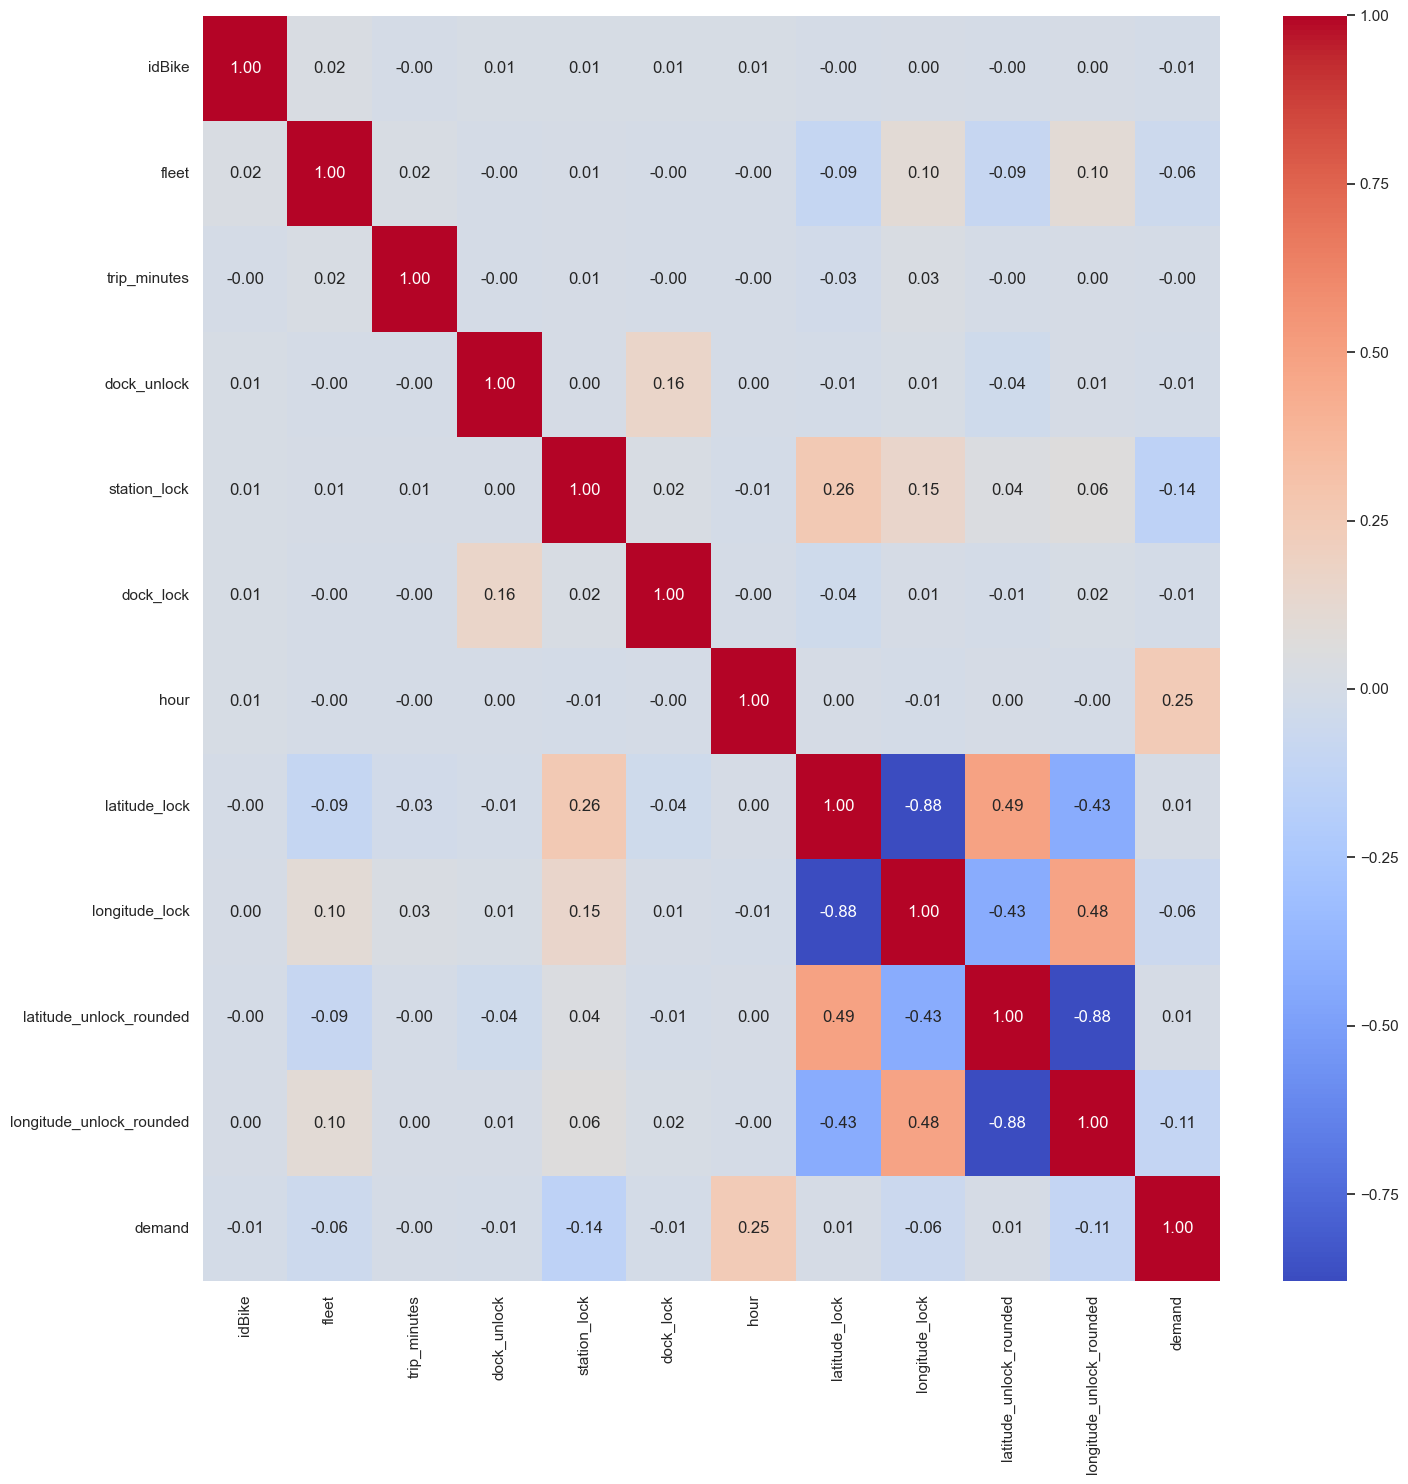

In [43]:
column_to_exclude = ['idBike']

columns_to_keep = []

for col in full_dataframe.columns:
    if col != column_to_exclude:
        columns_to_keep.append(col)


result_df = full_dataframe[columns_to_keep]

corr_matrix = result_df.corr()


fig, ax = plt.subplots(figsize=(15, 15))  

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

plt.tight_layout()

plt.show()

In [44]:
full_dataframe.head()

,idBike,fleet,trip_minutes,dock_unlock,station_lock,dock_lock,hour,latitude_lock,longitude_lock,latitude_unlock_rounded,longitude_unlock_rounded,demand
0,1718.0,1.0,16.28,3.0,64.0,4.0,0,40.419752,-3.688398,40.43,-3.67,2248
1,7657.0,1.0,6.62,22.0,190.0,17.0,0,40.418667,-3.665778,40.43,-3.67,2248
2,917.0,1.0,24.03,2.0,196.0,5.0,0,40.431194,-3.659056,40.43,-3.67,2248
3,5384.0,1.0,5.00,12.0,196.0,22.0,0,40.431194,-3.659056,40.43,-3.67,2248
4,6371.0,1.0,10.32,1.0,32.0,19.0,0,40.418152,-3.698437,40.43,-3.67,2248


## MODEL SELECTION AND TRAININIG

In [45]:
total_na = full_dataframe.isnull().sum().sort_values(ascending=False)

print(total_na)

station_lock                19907
dock_lock                   19907
dock_unlock                 16792
latitude_lock                   3
longitude_lock                  3
idBike                          0
fleet                           0
trip_minutes                    0
hour                            0
latitude_unlock_rounded         0
longitude_unlock_rounded        0
demand                          0
dtype: int64


In [46]:
full_dataframe = full_dataframe.fillna(full_dataframe.median())

## Feature Selection

In [47]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

In [48]:
X = full_dataframe.drop('demand', axis = 1)

y = full_dataframe['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 'all')

selection_model.fit(X_train, y_train)

ix = selection_model.get_support()

X_train = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train.head()


,idBike,fleet,trip_minutes,dock_unlock,station_lock,dock_lock,hour,latitude_lock,longitude_lock,latitude_unlock_rounded,longitude_unlock_rounded
0,7043.0,1.0,0.30,12.0,52.0,12.0,3.0,40.405611,-3.702259,40.41,-3.70
1,7946.0,1.0,13.00,8.0,232.0,8.0,10.0,40.409136,-3.728534,40.40,-3.70
2,23.0,1.0,0.17,18.0,202.0,18.0,19.0,40.437250,-3.677222,40.44,-3.68
3,5717.0,1.0,26.13,10.0,213.0,13.0,6.0,40.453500,-3.703278,40.41,-3.70
4,7712.0,1.0,19.20,9.0,229.0,18.0,21.0,40.400368,-3.634587,40.41,-3.68


## Training

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [50]:
print(f"Intercepto (a): {model.intercept_}")
                                            
print(f"Coeficientes (b): {model.coef_}") 

Intercepto (a): 5695.257133199895
Coeficientes (b): [    -0.0266  -2302.9635     -0.0277     -6.2076     -7.5302     -1.962
    185.589     522.2367   5171.3083  -5010.9011 -54855.8669]


In [51]:
y_pred = model.predict(X_test)
y_pred


array([6977.7614, 7079.777 , 7501.9781, ..., 7614.8996, 7092.0487,
       6091.0563])

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred)}")                                                                       
print(f"Coefficient of Determination: {r2_score(y_test, y_pred)}") 


Root Mean Squared Error: 17273327.571883556
Coefficient of Determination: 0.12372008112329935


The current model is giving us a high Root Mean Squared Error, which means the model predictions are very different form the actual values. The model is not performing well and it's giving us error. We will have to try a different approach.

### Training with XGBoost

In [53]:
import xgboost as xgb

regressor = xgb.XGBRegressor(n_estimators = 100, max_depth = 10, random_state = 0) # Here we're creating a model called XGBRegressor from the XGBoost library.
                                                                                   # n_estimators tells the model to do 100 rounds of learning.
                                                                                   # max_depth controls how deep the model goes to understand the data.
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error : {rmse}")

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

Root Mean Squared Error : 4.52880252101806


Adjusting the result we obtained using XGBoost we were able to reduce the RMSE considerabily, from 17273327.571883556 to 4.52880252101806.

In [54]:
print(f"Coefficient of Determination: {r2_score(y_test, y_pred)}")

Coefficient of Determination: 0.9999989595202854


In the same manner, we are getting a much better Coefficient of Determination, closer to 1.

## Saving the model

In [55]:
from pickle import dump

dump(regressor, open("bicimad_model.sav", 'wb'))